# Data Load

In [1]:
import config
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load(config.data_path)

extension : .xlsx
Loaded 36602 records from /Volumes/GoogleDrive/내 드라이브/MemeProject/data/row_data/meme_v1.xlsx


In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,총 세트 수,총 발화문 수,밈 제외 발화,밈 발화 수,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1525,24897,15747,9150,NaN,NaN,NaN
1,NaN,문장일련번호,관리번호,밈 id,set,utt,발화구분,대화소재,ARG0,발화문,ARG1,ARG_op,서술어,화행(U),meme_ID
2,NaN,1,Aa0001,DT0044,1,1,U,학교생활,나,나 중간고사 반에서 1등했어,중간고사,반에서,1등하다,자랑,NaN
3,NaN,2,NaN,NaN,NaN,2,U,학교생활,나,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,반에서,점수 제일 잘 받다,자랑,NaN
4,NaN,3,NaN,NaN,NaN,3,U,학교생활,나,나 반에서 중간 성적 제일 좋아,중간,반에서,성적 제일 좋다,자랑,NaN


#### header 생성

In [4]:
new_header = df.iloc[1]
df = df[2:]
df.columns = new_header

In [5]:
df.head(10)

1,NaN,문장일련번호,관리번호,밈 id,set,utt,발화구분,대화소재,ARG0,발화문,ARG1,ARG_op,서술어,화행(U),meme_ID
2,NaN,1,Aa0001,DT0044,1,1,U,학교생활,나,나 중간고사 반에서 1등했어,중간고사,반에서,1등하다,자랑,NaN
3,NaN,2,NaN,NaN,NaN,2,U,학교생활,나,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,반에서,점수 제일 잘 받다,자랑,NaN
4,NaN,3,NaN,NaN,NaN,3,U,학교생활,나,나 반에서 중간 성적 제일 좋아,중간,반에서,성적 제일 좋다,자랑,NaN
5,NaN,4,NaN,NaN,NaN,4,U,학교생활,나,우리 반에서 내가 시험 제일 잘 봤다,시험,우리 반에서,제일 잘 보다,자랑,NaN
6,NaN,5,NaN,NaN,NaN,5,U,학교생활,NaN,중간고사 반 1등 먹음,중간고사,반,1등 먹다,자랑,NaN
7,NaN,6,NaN,NaN,NaN,6,U,학교생활,나,중간시험 내가 반 1등이야,중간시험,반,1등이다,자랑,NaN
8,NaN,7,NaN,NaN,NaN,7,CPR,NaN,NaN,그렇다면 통 크게 함 쏴야지!,NaN,NaN,NaN,NaN,NaN
9,NaN,8,NaN,NaN,NaN,8,CPR,NaN,NaN,ㄹㅇ? 대길이 한턱 쏴야겠네,NaN,NaN,NaN,NaN,NaN
10,NaN,9,NaN,NaN,NaN,9,CPR,NaN,NaN,1등 기념으로 플렉스 함 가즈아~!,NaN,NaN,NaN,NaN,NaN
11,NaN,10,NaN,NaN,NaN,10,CPR,NaN,NaN,진심? 그럼 자축하러 가야지,NaN,NaN,NaN,NaN,NaN


### Column Organize

In [6]:
df = df[['발화구분', '발화문', 'meme_ID']]

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.head()

1,발화구분,발화문,meme_ID
0,U,나 중간고사 반에서 1등했어,NaN
1,U,중간고사 점수 내가 반에서 제일 잘 받음,NaN
2,U,나 반에서 중간 성적 제일 좋아,NaN
3,U,우리 반에서 내가 시험 제일 잘 봤다,NaN
4,U,중간고사 반 1등 먹음,NaN


In [9]:
df_user = df[df['발화구분']=='U']

In [10]:
df_user.reset_index(inplace=True, drop=True)

In [11]:
df_user.head(10)

1,발화구분,발화문,meme_ID
0,U,나 중간고사 반에서 1등했어,NaN
1,U,중간고사 점수 내가 반에서 제일 잘 받음,NaN
2,U,나 반에서 중간 성적 제일 좋아,NaN
3,U,우리 반에서 내가 시험 제일 잘 봤다,NaN
4,U,중간고사 반 1등 먹음,NaN
5,U,중간시험 내가 반 1등이야,NaN
6,U,너 왜 이렇게 멍청하냐?,NaN
7,U,이 새끼 빡대가리잖아?,NaN
8,U,너 말귀 못 알아듣냐고,NaN
9,U,병신 이해력 딸리네,NaN


In [12]:
df_user.rename(columns={'발화구분':'type', '발화문':'content', 'meme_ID':'meme_id'}, inplace=True)

/tmp/ipykernel_7585/3915493298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user.rename(columns={'발화구분':'type', '발화문':'content', 'meme_ID':'meme_id'}, inplace=True)


In [13]:
df_user.shape

(9150, 3)

# 

# 

# add user dict

## * 추가 시에만

### find konlpy path

In [16]:
import konlpy
konlpy.data.path

['/Users/seonghwanpark/konlpy_data',
 '/usr/share/konlpy_data',
 '/usr/local/share/konlpy_data',
 '/usr/lib/konlpy_data',
 '/usr/local/lib/konlpy_data',
 '/Users/seonghwanpark/.pyenv/versions/3.8.15/envs/shpark/lib/python3.8/site-packages/konlpy/data']

### test

In [ ]:
from konlpy.tag import Okt

In [ ]:
jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
okt = Okt(jvmpath=jvm_path)

In [17]:
# 태깅이 안되는 예. 이런 단어는 사용자 사전에 추가하면 하단부 처럼 정상적으로 추출한다.
print(okt.pos("순대국 먹고 싶다."))
print(okt.pos("순댓국 먹고 싶다."))
print(okt.pos("패스트파이브에서 일을 합니다."))
print(okt.pos("아이오아이는 정말 이뻐요."))

[('순대국', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('순댓국', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('패스트파이브', 'Noun'), ('에서', 'Josa'), ('일', 'Noun'), ('을', 'Josa'), ('합니다', 'Verb'), ('.', 'Punctuation')]
[('아이오아이', 'Noun'), ('는', 'Josa'), ('정말', 'Noun'), ('이뻐요', 'Adjective'), ('.', 'Punctuation')]


### user dictionary

In [18]:
import os

os.chdir('/Users/seonghwanpark/.pyenv/versions/3.8.15/envs/shpark/lib/python3.8/site-packages/konlpy/java')
os.getcwd() 

'/Users/seonghwanpark/.pyenv/versions/3.8.15/envs/shpark/lib/python3.8/site-packages/konlpy/java'

In [19]:
!jar xvf open-korean-text-2.1.0.jar

  생성됨: META-INF/
 증가됨: META-INF/MANIFEST.MF
  생성됨: org/
  생성됨: org/openkoreantext/
  생성됨: org/openkoreantext/processor/
  생성됨: org/openkoreantext/processor/tools/
 증가됨: org/openkoreantext/processor/tools/UpdateAllTheExamples.class
 증가됨: org/openkoreantext/processor/tools/CreateConjugationExamples.class
 증가됨: org/openkoreantext/processor/tools/CreateConjugationExamples$ConjugationExample.class
 증가됨: org/openkoreantext/processor/tools/CreatePhraseExtractionExamples$PhraseExample.class
 증가됨: org/openkoreantext/processor/tools/CreateParsingExamples.class
 증가됨: org/openkoreantext/processor/tools/CreatePhraseExtractionExamples$.class
 증가됨: org/openkoreantext/processor/tools/CreateConjugationExamples$.class
 증가됨: org/openkoreantext/processor/tools/DeduplicateAndSortDictionaries$.class
 증가됨: org/openkoreantext/processor/tools/CreateChunkParsingCandidates$.class
 증가됨: org/openkoreantext/processor/tools/CreateChunkParsingCandidates.class
 증가됨: org/openkoreantext/processor/tools/DeduplicateAndSor

##### open user dict

In [8]:
with open(f"/Users/seonghwanpark/.pyenv/versions/3.8.15/envs/shpark/lib/python3.8/site-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

In [9]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n'

##### add new word

In [10]:
data += '순댓국\n순대국\n아이오아이\n패스트파이브\n'

##### file save

In [11]:
with open("/Users/seonghwanpark/.pyenv/versions/3.8.15/envs/shpark/lib/python3.8/site-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [12]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n순댓국\n순대국\n아이오아이\n패스트파이브\n'

In [13]:
!jar cvf open-korean-text-2.1.0.jar org
!rm org

Manifest를 추가함
추가하는 중: org/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/tools/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/tools/UpdateAllTheExamples.class(입력 = 1089) (출력 = 756)(30%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreateConjugationExamples.class(입력 = 2367) (출력 = 1659)(29%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreateConjugationExamples$ConjugationExample.class(입력 = 3569) (출력 = 1415)(60%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreatePhraseExtractionExamples$PhraseExample.class(입력 = 3825) (출력 = 1443)(62%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreateParsingExamples.class(입력 = 2427) (출력 = 1732)(28%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreatePhraseExtractionExamples$.class(입력 = 5989) (출력 = 2472)(58%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/CreateConjugationExamples$.class(입

### test

In [15]:
from konlpy.tag import Okt

jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
okt = Okt(jvmpath=jvm_path)

[0.003s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016dae0000-0x000000016daec000).
[0.003s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [16]:
# 태깅이 안되는 예. 이런 단어는 사용자 사전에 추가하면 
print(okt.pos("순대국 먹고 싶다."))
print(okt.pos("순댓국 먹고 싶다."))
print(okt.pos("패스트파이브에서 일을 합니다."))
print(okt.pos("아이오아이는 정말 이뻐요."))

[('순대국', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('순댓국', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('패스트파이브', 'Noun'), ('에서', 'Josa'), ('일', 'Noun'), ('을', 'Josa'), ('합니다', 'Verb'), ('.', 'Punctuation')]
[('아이오아이', 'Noun'), ('는', 'Josa'), ('정말', 'Noun'), ('이뻐요', 'Adjective'), ('.', 'Punctuation')]


# 

# Okt

In [17]:
import re
import swifter
from konlpy.tag import Okt

In [18]:
jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
okt = Okt(jvmpath=jvm_path)

### preprocessing

In [19]:
def remove_regex(content):
    result = re.sub('[^0-9a-zA-Zㄱ-힣\s]', '', str(content))
    return result

In [20]:
df_user_content = df_user[df_user.content.isnull()]
print(df_user_content.head())

Empty DataFrame
Columns: [type, content, meme_id]
Index: []


In [21]:
df_user['remove_regex'] = df_user.content.swifter.apply(remove_regex)

Pandas Apply:   0%|          | 0/9150 [00:00<?, ?it/s]

/tmp/ipykernel_7585/2011501844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['remove_regex'] = df_user.content.swifter.apply(remove_regex)


### okt morphs

In [22]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [23]:
def make_pos(content):
    result = okt.pos(str(content))

    # 불용어 제거
    result = [word for word in result if not word[0] in stopwords]
    
    # Noun 명사, Verb 동사, Adjective 형용사, Adverb 부사, Exclamation 감탄사, Suffix 접미사, KoreanParticle 신조어
    # 조사, 관형사, 접속사 등 제거
    result = [i[0] for i in result if i[1] == 'Noun' or i[1] == 'Verb' or i[1] == 'Adjective' or i[1] == 'Adverb' or i[1] == 'Exclamation' or i[1] == 'Suffix' or i[1] == 'KoreanParticle']

    return result

In [24]:
df_user['pos'] = df_user.remove_regex.swifter.apply(make_pos)

Pandas Apply:   0%|          | 0/9150 [00:00<?, ?it/s]

/tmp/ipykernel_7585/1467950993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['pos'] = df_user.remove_regex.swifter.apply(make_pos)


In [25]:
df_user.head(20)

1,type,content,meme_id,remove_regex,pos
0,U,나 중간고사 반에서 1등했어,NaN,나 중간고사 반에서 1등했어,"[나, 중간고사, 반]"
1,U,중간고사 점수 내가 반에서 제일 잘 받음,NaN,중간고사 점수 내가 반에서 제일 잘 받음,"[중간고사, 점수, 내, 반, 제일, 받음]"
2,U,나 반에서 중간 성적 제일 좋아,NaN,나 반에서 중간 성적 제일 좋아,"[나, 반, 중간, 성적, 제일, 좋아]"
3,U,우리 반에서 내가 시험 제일 잘 봤다,NaN,우리 반에서 내가 시험 제일 잘 봤다,"[우리, 반, 내, 시험, 제일, 봤다]"
4,U,중간고사 반 1등 먹음,NaN,중간고사 반 1등 먹음,"[중간고사, 반, 먹음]"
5,U,중간시험 내가 반 1등이야,NaN,중간시험 내가 반 1등이야,"[중간, 시험, 내, 반]"
6,U,너 왜 이렇게 멍청하냐?,NaN,너 왜 이렇게 멍청하냐,"[너, 왜, 이렇게, 멍청하냐]"
7,U,이 새끼 빡대가리잖아?,NaN,이 새끼 빡대가리잖아,"[새끼, 빡, 대가리, 잖아]"
8,U,너 말귀 못 알아듣냐고,NaN,너 말귀 못 알아듣냐고,"[너, 말귀, 못, 알아듣냐고]"
9,U,병신 이해력 딸리네,NaN,병신 이해력 딸리네,"[병신, 이해력, 딸리네]"


In [26]:
df_user.shape

(9150, 5)

### length

In [27]:
import matplotlib.pyplot as plt

최대 길이 : 13
평균 길이 : 5.029289617486339


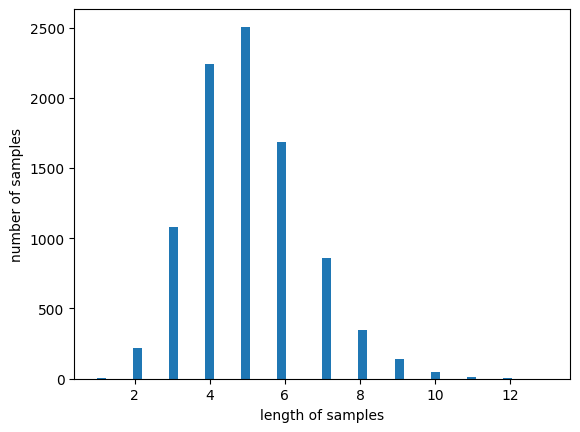

In [28]:
print('최대 길이 :',max(len(sent) for sent in df_user.pos))
print('평균 길이 :',sum(map(len, df_user.pos))/len(df_user.pos))

plt.hist([len(sent) for sent in df_user.pos], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 

# Save

In [29]:
df_user = df_user[['content', 'pos']]

In [30]:
df_user.head()

1,content,pos
0,나 중간고사 반에서 1등했어,"[나, 중간고사, 반]"
1,중간고사 점수 내가 반에서 제일 잘 받음,"[중간고사, 점수, 내, 반, 제일, 받음]"
2,나 반에서 중간 성적 제일 좋아,"[나, 반, 중간, 성적, 제일, 좋아]"
3,우리 반에서 내가 시험 제일 잘 봤다,"[우리, 반, 내, 시험, 제일, 봤다]"
4,중간고사 반 1등 먹음,"[중간고사, 반, 먹음]"


In [31]:
fm.save(config.temp_data, df_user)

Saved 9150 records
